| Concept      | Refers to                                                    | Scalar Class | Array Class      | pandas Data Type                         | Primary Creation Method             |
| :----------- | ------------------------------------------------------------ | :----------- | :--------------- | :--------------------------------------- | :---------------------------------- |
| Date times   | A specific date and time with timezone support               | `Timestamp`  | `DatetimeIndex`  | `datetime64[ns]` or `datetime64[ns, tz]` | `to_datetime` or `date_range`       |
| Time deltas  | An absolute time duration                                    | `Timedelta`  | `TimedeltaIndex` | `timedelta64[ns]`                        | `to_timedelta` or `timedelta_range` |
| Time spans   | A span of time defined by a point in time and its associated frequency | `Period`     | `PeriodIndex`    | `period[freq]`                           | `Period` or `period_range`          |
| Date offsets | A relative time duration that respects calendar arithmetic   | `DateOffset` | `None`           | `None`                                   | `DateOffset`                        |



In [1]:
import pandas as pd

## Timestamps

### Creating Timestamps

In [4]:
import datetime

pd.Timestamp(datetime.datetime(2012, 5, 1))

Timestamp('2012-05-01 00:00:00')

In [5]:
pd.Timestamp('2012-05-01')

Timestamp('2012-05-01 00:00:00')

In [6]:
pd.Timestamp(2012, 5, 1)

Timestamp('2012-05-01 00:00:00')

### Converting to timestamps

#### `pd.to_datetime()`

- Pass a single string to `to_datetime`, it returns a single `Timestamp`.

In [10]:
pd.to_datetime('2010/10/12')

Timestamp('2010-10-12 00:00:00')

- Passing a series of dates by default yields a `DatetimeIndex`

In [8]:
pd.to_datetime(['2005/11/23', '2010.12.31'])

DatetimeIndex(['2005-11-23', '2010-12-31'], dtype='datetime64[ns]', freq=None)

- `dayfirst` flag for dates which start with the day first

In [9]:
pd.to_datetime(['14-01-2012', '01-14-2012'], dayfirst=True)

DatetimeIndex(['2012-01-14', '2012-01-14'], dtype='datetime64[ns]', freq=None)

In [14]:
pd.to_datetime('20/12/2020', dayfirst=True)

Timestamp('2020-12-20 00:00:00')

- Pass a `format` argument to ensure specific parsing

In [16]:
pd.to_datetime('2010/11/12', format='%Y/%m/%d')

Timestamp('2010-11-12 00:00:00')

#### Use the `DatetimeIndex` constructor directly

In [13]:
pd.DatetimeIndex(['2018-01-01', '2018-01-03', '2018-01-05'])

DatetimeIndex(['2018-01-01', '2018-01-03', '2018-01-05'], dtype='datetime64[ns]', freq=None)

## Time spans

The span represented by `Period` can be specified explicitly, or inferred from datetime string format.

In [17]:
# Specify explicityly
pd.Period('2011-01')

Period('2011-01', 'M')

In [18]:
# Infer from datetime string format
pd.Period('2012-05', freq='D')

Period('2012-05-01', 'D')

`DatetimeIndex` -> `PeriodIndex`: `to_period()`

In [28]:
dates = pd.to_datetime([datetime.datetime(2015, 7, 3),
                        '4th of August, 2015',
                        '2015-Sep-6',
                        '10-07-2015',
                        '20151108'])
dates

DatetimeIndex(['2015-07-03', '2015-08-04', '2015-09-06', '2015-10-07',
               '2015-11-08'],
              dtype='datetime64[ns]', freq=None)

In [29]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-08-04', '2015-09-06', '2015-10-07',
             '2015-11-08'],
            dtype='period[D]', freq='D')

In [30]:
dates.to_period('T')

PeriodIndex(['2015-07-03 00:00', '2015-08-04 00:00', '2015-09-06 00:00',
             '2015-10-07 00:00', '2015-11-08 00:00'],
            dtype='period[T]', freq='T')

In [31]:
dates.to_period('M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11'], dtype='period[M]', freq='M')

## Time deltas

A `TimedeltaIndex` is created, for example, when a date is subtracted from another:

In [101]:
dates - dates[0]

TimedeltaIndex(['0 days', '32 days', '65 days', '96 days', '128 days'], dtype='timedelta64[ns]', freq=None)

## Date offsets

A `DateOffset` is similar to a [`Timedelta`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timedelta.html#pandas.Timedelta) that represents a duration of time but follows specific calendar duration rules. For example, a [`Timedelta`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timedelta.html#pandas.Timedelta) day will always increment `datetimes` by 24 hours, while a `DateOffset` day will increment `datetimes` to the same time the next day whether a day represents 23, 24 or 25 hours due to daylight savings time.

In [103]:
date = pd.to_datetime('2018-01-05')
date

Timestamp('2018-01-05 00:00:00')

In [105]:
date.day_name()

'Friday'

In [107]:
# Add two business days (Friday --> next Tuesday)
two_business_days = 2 * pd.offsets.BDay()
new_date = date + two_business_days
new_date

Timestamp('2018-01-09 00:00:00')

In [109]:
new_date.day_name()

'Tuesday'

`DateOffsets` additionally have `rollforward()` and `rollback()` methods for moving a date forward or backward respectively to a valid offset date relative to the offset.

In [110]:
date = pd.to_datetime('2018-01-06 00:00:00')
date.day_name()

'Saturday'

In [113]:
# BusinessHour's valid offset dates are Monday through Friday
offset = pd.offsets.BusinessHour(start='09:00')

# Bring the date to the closest forward offset date
next_date = offset.rollforward(date)

In [114]:
next_date

Timestamp('2018-01-08 09:00:00')

In [116]:
next_date.day_name()

'Monday'

## Regular sequences

Create regular date sequences:

- `pd.date_range()` for timestamps, 
- `pd.period_range()` for periods, and 
- `pd.timedelta_range()` for time deltas.

Just like Pyhon's `range()` and Numpy's `np.arange()`, methods above accept a start date, an end date, and an optional frequency code to create a regular sequence of dates.

Specifying `start`, `end`, and `periods` will generate a range of evenly spaced dates from `start` to `end` inclusively, with `periods` number of elements in the resulting `DatetimeIndex`

### `date_range()`

In [37]:
pd.date_range('2020-4-19', '2020-4-26')

DatetimeIndex(['2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22',
               '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26'],
              dtype='datetime64[ns]', freq='D')

In [54]:
pd.date_range('2020-04-19', '2020-04-30', periods=12)

DatetimeIndex(['2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22',
               '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26',
               '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30'],
              dtype='datetime64[ns]', freq=None)

In [57]:
pd.date_range('2020-04-19', '2020-04-20', freq='H')

DatetimeIndex(['2020-04-19 00:00:00', '2020-04-19 01:00:00',
               '2020-04-19 02:00:00', '2020-04-19 03:00:00',
               '2020-04-19 04:00:00', '2020-04-19 05:00:00',
               '2020-04-19 06:00:00', '2020-04-19 07:00:00',
               '2020-04-19 08:00:00', '2020-04-19 09:00:00',
               '2020-04-19 10:00:00', '2020-04-19 11:00:00',
               '2020-04-19 12:00:00', '2020-04-19 13:00:00',
               '2020-04-19 14:00:00', '2020-04-19 15:00:00',
               '2020-04-19 16:00:00', '2020-04-19 17:00:00',
               '2020-04-19 18:00:00', '2020-04-19 19:00:00',
               '2020-04-19 20:00:00', '2020-04-19 21:00:00',
               '2020-04-19 22:00:00', '2020-04-19 23:00:00',
               '2020-04-20 00:00:00'],
              dtype='datetime64[ns]', freq='H')

### `period_range()`

In [39]:
pd.period_range('2020-01', periods=8, freq='M')

PeriodIndex(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
             '2020-07', '2020-08'],
            dtype='period[M]', freq='M')

### `timedelta_range()`

In [61]:
pd.timedelta_range(0, periods=30, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00', '0 days 10:00:00', '0 days 11:00:00',
                '0 days 12:00:00', '0 days 13:00:00', '0 days 14:00:00',
                '0 days 15:00:00', '0 days 16:00:00', '0 days 17:00:00',
                '0 days 18:00:00', '0 days 19:00:00', '0 days 20:00:00',
                '0 days 21:00:00', '0 days 22:00:00', '0 days 23:00:00',
                '1 days 00:00:00', '1 days 01:00:00', '1 days 02:00:00',
                '1 days 03:00:00', '1 days 04:00:00', '1 days 05:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [42]:
pd.timedelta_range(0, periods=10, freq='D')

TimedeltaIndex(['0 days', '1 days', '2 days', '3 days', '4 days', '5 days',
                '6 days', '7 days', '8 days', '9 days'],
               dtype='timedelta64[ns]', freq='D')

In [43]:
pd.timedelta_range(0, periods=10, freq='T')

TimedeltaIndex(['00:00:00', '00:01:00', '00:02:00', '00:03:00', '00:04:00',
                '00:05:00', '00:06:00', '00:07:00', '00:08:00', '00:09:00'],
               dtype='timedelta64[ns]', freq='T')

### Frequencies and Offsets

Main codes of frequency or date offset:

| Code | Description  | Code | Description          |
| :--- | :----------- | :--- | :------------------- |
| `D`  | Calendar day | `B`  | Business day         |
| `W`  | Weekly       |      |                      |
| `M`  | Month end    | `BM` | Business month end   |
| `Q`  | Quarter end  | `BQ` | Business quarter end |
| `A`  | Year end     | `BA` | Business year end    |
| `H`  | Hours        | `BH` | Business hours       |
| `T`  | Minutes      |      |                      |
| `S`  | Seconds      |      |                      |
| `L`  | Milliseonds  |      |                      |
| `U`  | Microseconds |      |                      |
| `N`  | nanoseconds  |      |                      

The monthly, quarterly, and annual frequencies are all marked at the end of the specified period. By adding an S suffix to any of these, they instead will be marked at the beginning:

| Code | Description   |      | Code  | Description            |
| :--- | :------------ | :--- | :---- | :--------------------- |
| `MS` | Month start   |      | `BMS` | Business month start   |
| `QS` | Quarter start |      | `BQS` | Business quarter start |
| `AS` | Year start    |      | `BAS` | Business year start    |

Additionally, you can change the month used to mark any quarterly or annual code by adding a three-letter month code as a suffix:

- `Q-JAN`, `BQ-FEB`, `QS-MAR`, `BQS-APR`, etc.
- `A-JAN`, `BA-FEB`, `AS-MAR`, `BAS-APR`, etc.

In the same way, the split-point of the weekly frequency can be modified by adding a three-letter weekday code:

- `W-SUN`, `W-MON`, `W-TUE`, `W-WED`, etc.

On top of this, codes can be combined with numbers to specify other frequencies.

For example, for a frequency of 2 hours 30 minutes, we can combine the hour (`H`) and minute (`T`) codes as follows:

In [63]:
pd.timedelta_range(0, periods=4, freq='2H30T')

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00'], dtype='timedelta64[ns]', freq='150T')

In [64]:
# Business day
pd.date_range('2020-04-20', periods=14, freq='B')

DatetimeIndex(['2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23',
               '2020-04-24', '2020-04-27', '2020-04-28', '2020-04-29',
               '2020-04-30', '2020-05-01', '2020-05-04', '2020-05-05',
               '2020-05-06', '2020-05-07'],
              dtype='datetime64[ns]', freq='B')

In [68]:
# Weekday, i.e., Tuesday
pd.date_range('2020-04-20', periods=3, freq='W-TUE')

DatetimeIndex(['2020-04-21', '2020-04-28', '2020-05-05'], dtype='datetime64[ns]', freq='W-TUE')

In [73]:
# Month start
pd.date_range('2020-04', periods=3, freq='MS')

DatetimeIndex(['2020-04-01', '2020-05-01', '2020-06-01'], dtype='datetime64[ns]', freq='MS')

Note: All of these short codes refer to specific instances of Pandas time series offsets, which can be found in the `pd.tseries.offsets` module.

In [67]:
from pandas.tseries.offsets import BDay

pd.date_range('2020-04-20', periods=14, freq=BDay())

DatetimeIndex(['2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23',
               '2020-04-24', '2020-04-27', '2020-04-28', '2020-04-29',
               '2020-04-30', '2020-05-01', '2020-05-04', '2020-05-05',
               '2020-05-06', '2020-05-07'],
              dtype='datetime64[ns]', freq='B')

## Indexing

`DatetimeIndex` objects have all the basic functionality of regular `Index` objects, and a smorgasbord of advanced time series specific methods for easy frequency processing.

### As regular index

In [75]:
rng = pd.date_range('2020-04-20', periods=5, freq='D')
rng

DatetimeIndex(['2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23',
               '2020-04-24'],
              dtype='datetime64[ns]', freq='D')

In [79]:
import numpy as np

ts = pd.Series(np.arange(5), index=rng)
ts

2020-04-20    0
2020-04-21    1
2020-04-22    2
2020-04-23    3
2020-04-24    4
Freq: D, dtype: int64

In [80]:
ts[:5].index

DatetimeIndex(['2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23',
               '2020-04-24'],
              dtype='datetime64[ns]', freq='D')

In [81]:
ts.index[1:4]

DatetimeIndex(['2020-04-21', '2020-04-22', '2020-04-23'], dtype='datetime64[ns]', freq='D')

### Partial indexing

To provide convenience for accessing longer time series, you can also pass in the year or year and month as strings.

> Since the partial string selection is a form of label slicing, the endpoints will be *included*. 

In [89]:
# Example 1

rng = pd.date_range('2020-01-01', periods=24, freq='M')
ts = pd.Series(np.arange(24), index=rng)
ts

2020-01-31     0
2020-02-29     1
2020-03-31     2
2020-04-30     3
2020-05-31     4
2020-06-30     5
2020-07-31     6
2020-08-31     7
2020-09-30     8
2020-10-31     9
2020-11-30    10
2020-12-31    11
2021-01-31    12
2021-02-28    13
2021-03-31    14
2021-04-30    15
2021-05-31    16
2021-06-30    17
2021-07-31    18
2021-08-31    19
2021-09-30    20
2021-10-31    21
2021-11-30    22
2021-12-31    23
Freq: M, dtype: int64

In [87]:
ts['2020']

2020-01-31     0
2020-02-29     1
2020-03-31     2
2020-04-30     3
2020-05-31     4
2020-06-30     5
2020-07-31     6
2020-08-31     7
2020-09-30     8
2020-10-31     9
2020-11-30    10
2020-12-31    11
Freq: M, dtype: int64

In [96]:
# Example 2

rng = pd.date_range('2020-04-28', periods=20, freq='2D')
ts = pd.Series(np.arange(20), index=rng)
ts

2020-04-28     0
2020-04-30     1
2020-05-02     2
2020-05-04     3
2020-05-06     4
2020-05-08     5
2020-05-10     6
2020-05-12     7
2020-05-14     8
2020-05-16     9
2020-05-18    10
2020-05-20    11
2020-05-22    12
2020-05-24    13
2020-05-26    14
2020-05-28    15
2020-05-30    16
2020-06-01    17
2020-06-03    18
2020-06-05    19
Freq: 2D, dtype: int64

In [100]:
ts['2020-04'] # Get April

2020-04-28    0
2020-04-30    1
Freq: 2D, dtype: int64

In [98]:
ts['2020-04':'2020-05'] # Get April to May

2020-04-28     0
2020-04-30     1
2020-05-02     2
2020-05-04     3
2020-05-06     4
2020-05-08     5
2020-05-10     6
2020-05-12     7
2020-05-14     8
2020-05-16     9
2020-05-18    10
2020-05-20    11
2020-05-22    12
2020-05-24    13
2020-05-26    14
2020-05-28    15
2020-05-30    16
Freq: 2D, dtype: int64

## Resampling

`resample()` is a time-based groupby, followed by a reduction method on each of its groups.

The `resample()` method can be used directly from `DataFrameGroupBy` objects.

Alternatively, we can use the much simpler `asfreq()` method. The primary difference between the two is that `resample()` is fundamentally a *data aggregation*, while `asfreq()` is fundamentally a *data selection*.

### Basics

In [126]:
rng = pd.date_range('1/1/2012', periods=100, freq='D')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01    230
2012-01-02    417
2012-01-03    259
2012-01-04    291
2012-01-05    223
             ... 
2012-04-05    473
2012-04-06     47
2012-04-07    277
2012-04-08    280
2012-04-09    221
Freq: D, Length: 100, dtype: int64

In [148]:
# Sampling the sum of every 10 days
ts.resample('10D').sum()

2012-01-01    2996
2012-01-11    2964
2012-01-21    2684
2012-01-31    2716
2012-02-10    2331
2012-02-20    2238
2012-03-01    2563
2012-03-11    2537
2012-03-21    2350
2012-03-31    2388
Freq: 10D, dtype: int64

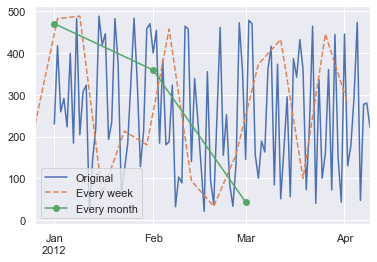

In [161]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

# fig, ax = plt.subplots(2, sharex=True)

ts.plot(style='-', label='Original')

# REsampling with mean of every week (forward fill)
ts.asfreq('W', method='ffill').plot(style='--', label='Every week')

# REsampling with mean of every month (backward fill)
ts.asfreq('M', method='bfill').plot(style='-o', label='Every month')

plt.legend()

The `resample` function is very flexible and allows you to specify many different parameters to control the frequency conversion and resampling operation.

- Any function available via [dispatching](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#groupby-dispatch) is available as a method of the returned object, including `sum`, `mean`, `std`, `sem`, `max`, `min`, `median`, `first`, `last`, `ohlc`:

In [130]:
# Sampling the mean of every week
ts.resample('W').mean()

2012-01-01    230.000000
2012-01-08    322.142857
2012-01-15    243.000000
2012-01-22    316.000000
2012-01-29    255.428571
2012-02-05    361.285714
2012-02-12    236.428571
2012-02-19    188.714286
2012-02-26    181.571429
2012-03-04    316.714286
2012-03-11    240.857143
2012-03-18    247.285714
2012-03-25    228.142857
2012-04-01    239.142857
2012-04-08    239.857143
2012-04-15    221.000000
Freq: W-SUN, dtype: float64

- For downsampling, `closed` can be set to ‘left’ or ‘right’ to specify which end of the interval is closed

In [135]:
ts.resample('10D', closed='right').mean()

2011-12-22    230.000000
2012-01-01    308.900000
2012-01-11    301.600000
2012-01-21    277.900000
2012-01-31    233.500000
2012-02-10    228.000000
2012-02-20    234.500000
2012-03-01    279.100000
2012-03-11    238.800000
2012-03-21    216.900000
2012-03-31    260.555556
Freq: 10D, dtype: float64

- Parameters like `label` and `loffset` are used to manipulate the resulting labels. `label` specifies whether the result is labeled with the beginning or the end of the interval. `loffset` performs a time adjustment on the output labels.

In [136]:
ts.resample('W').mean() # by default label='left'

2012-01-01    230.000000
2012-01-08    322.142857
2012-01-15    243.000000
2012-01-22    316.000000
2012-01-29    255.428571
2012-02-05    361.285714
2012-02-12    236.428571
2012-02-19    188.714286
2012-02-26    181.571429
2012-03-04    316.714286
2012-03-11    240.857143
2012-03-18    247.285714
2012-03-25    228.142857
2012-04-01    239.142857
2012-04-08    239.857143
2012-04-15    221.000000
Freq: W-SUN, dtype: float64

In [143]:
ts.resample('W', label='left', loffset='1s').mean()

2011-12-25 00:00:01    230.000000
2012-01-01 00:00:01    322.142857
2012-01-08 00:00:01    243.000000
2012-01-15 00:00:01    316.000000
2012-01-22 00:00:01    255.428571
2012-01-29 00:00:01    361.285714
2012-02-05 00:00:01    236.428571
2012-02-12 00:00:01    188.714286
2012-02-19 00:00:01    181.571429
2012-02-26 00:00:01    316.714286
2012-03-04 00:00:01    240.857143
2012-03-11 00:00:01    247.285714
2012-03-18 00:00:01    228.142857
2012-03-25 00:00:01    239.142857
2012-04-01 00:00:01    239.857143
2012-04-08 00:00:01    221.000000
Freq: W-SUN, dtype: float64

### Upsampling

Upsampling means *sample more frequently*.

For upsampling, you can specify a way to upsample and the `limit` parameter to interpolate over the gaps that are created:

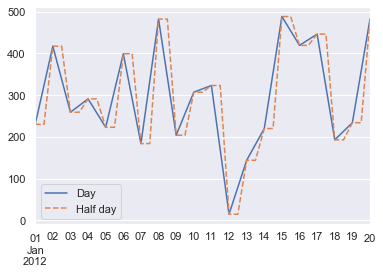

In [176]:
data = ts.iloc[:20]

data.plot(style='-', label='Day')

# UPsampling every half day
data.resample('12H').ffill(limit=2).plot(style='--', label='Half day')

plt.legend()

### Downsampling

Downsampling means *sample less frequently*.

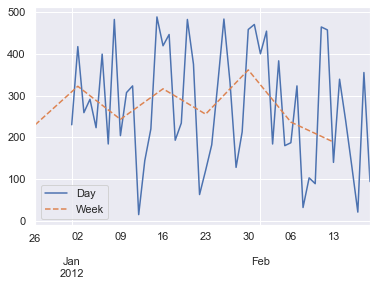

In [178]:
ts.iloc[:50].plot(style='-', label='Day')

# DOWNsampling with mean of every week
ts.iloc[:50].resample('W').mean().plot(style='--', label='Week')

plt.legend()

## Shifting data in time

Pandas has two closely related methods for computing this: `shift()` and `tshift()` In short, the difference between them is that `shift()` *shifts the data*, while `tshift()` *shifts the index*. In both cases, the shift is specified in multiples of the frequency.

In [203]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01     83
2012-01-02     36
2012-01-03    214
2012-01-04    382
2012-01-05    249
             ... 
2012-04-05    489
2012-04-06     15
2012-04-07    358
2012-04-08    406
2012-04-09     72
Freq: D, Length: 100, dtype: int64

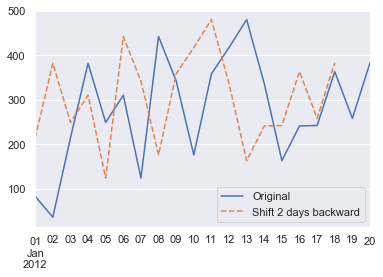

In [210]:
data.plot(style='-', label='Original')

# Shift data backward for 2 days
data.shift(-2).plot(style='--', label='Shift 2 days backward')

plt.legend()

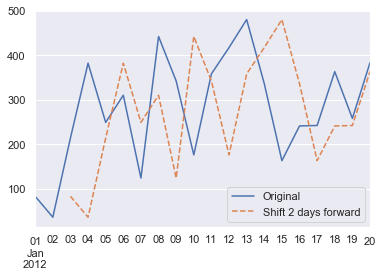

In [213]:
data = ts[:20]

data.plot(style='-', label='Original')

# Shift data forward for 2 days
# I.e, the first 5 value will be 0
data.shift(2).plot(style='--', label='Shift 2 days forward')

plt.legend()

Rather than changing the alignment of the data and the index, `DataFrame` and `Series` objects also have a [`tshift()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.tshift.html#pandas.Series.tshift) convenience method that changes all the dates in the index by a specified number of offsets:

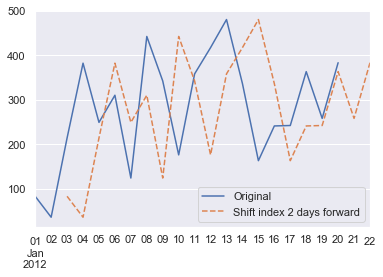

In [212]:
data.plot(style='-', label='Original')

# Shift index forward for 2 days
data.tshift(2).plot(style='--', label='Shift index 2 days forward')

plt.legend()